In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [89]:
data=pd.read_csv('aggregate_covid_country.csv',parse_dates=['Date'])
data=data.set_index('Date')
data

,Country,Confirmed,Recovered,Deaths
Date,,,,
2020-01-22,Afghanistan,0,0,0
2020-01-22,Albania,0,0,0
2020-01-22,Algeria,0,0,0
2020-01-22,Andorra,0,0,0
2020-01-22,Angola,0,0,0
...,...,...,...,...
2020-05-26,West Bank and Gaza,429,365,3
2020-05-26,Western Sahara,9,6,1
2020-05-26,Yemen,249,10,49


In [90]:
data.describe(include='all')

,Country,Confirmed,Recovered,Deaths
count,23688,2.368800e+04,23688.000000,23688.000000
unique,188,NaN,NaN,NaN
top,Azerbaijan,NaN,NaN,NaN
freq,126,NaN,NaN,NaN
mean,NaN,7.969368e+03,2581.801714,526.935030
std,NaN,5.842109e+04,15143.101257,3992.815956
min,NaN,0.000000e+00,0.000000,0.000000
25%,NaN,0.000000e+00,0.000000,0.000000
50%,NaN,1.800000e+01,1.000000,0.000000
75%,NaN,7.300000e+02,123.000000,13.000000


In [91]:
countrywise_data = {}
k = 0
x=pd.unique(data['Country'])
while k < 188:
    key = x[k]
    value = data[data['Country']==key]
    countrywise_data[key] = value 
    k += 1

In [92]:
countrywise_data['India']

,Country,Confirmed,Recovered,Deaths
Date,,,,
2020-01-22,India,0,0,0
2020-01-23,India,0,0,0
2020-01-24,India,0,0,0
2020-01-25,India,0,0,0
2020-01-26,India,0,0,0
...,...,...,...,...
2020-05-22,India,124794,51824,3726
2020-05-23,India,131423,54385,3868
2020-05-24,India,138536,57692,4024


In [93]:
x=pd.unique(data['Country'])
x

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

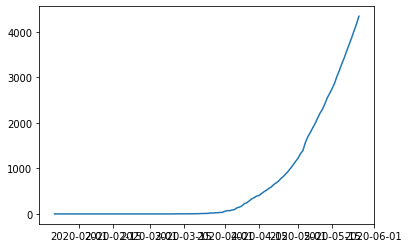

In [94]:
plt.plot(countrywise_data['India']['Deaths'])

(array([85., 10.,  6.,  4.,  4.,  4.,  4.,  3.,  3.,  3.]),
 array([   0. ,  434.4,  868.8, 1303.2, 1737.6, 2172. , 2606.4, 3040.8,
        3475.2, 3909.6, 4344. ]),
 <a list of 10 Patch objects>)

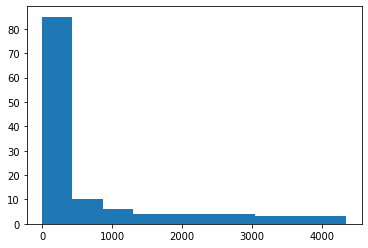

In [95]:
plt.hist(countrywise_data['India']['Deaths'])

In [96]:
new_data={}
for g in x:
    df=countrywise_data[g][['Confirmed','Recovered','Deaths']]
    new_data[g]=df[(df['Confirmed']!=0) & (df['Recovered']!=0) & (df['Deaths']!=0)]
    

In [97]:
new_data['India']

,Confirmed,Recovered,Deaths
Date,,,
2020-03-11,62,4,1
2020-03-12,73,4,1
2020-03-13,82,4,2
2020-03-14,102,4,2
2020-03-15,113,13,2
...,...,...,...
2020-05-22,124794,51824,3726
2020-05-23,131423,54385,3868
2020-05-24,138536,57692,4024


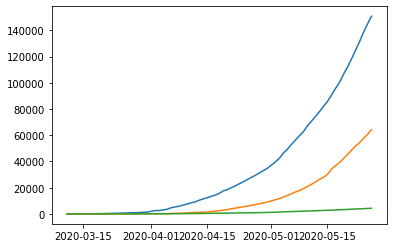

In [98]:
plt.plot(new_data['India'])

(array([36., 10.,  6.,  4.,  4.,  4.,  4.,  3.,  3.,  3.]),
 array([1.0000e+00, 4.3530e+02, 8.6960e+02, 1.3039e+03, 1.7382e+03,
        2.1725e+03, 2.6068e+03, 3.0411e+03, 3.4754e+03, 3.9097e+03,
        4.3440e+03]),
 <a list of 10 Patch objects>)

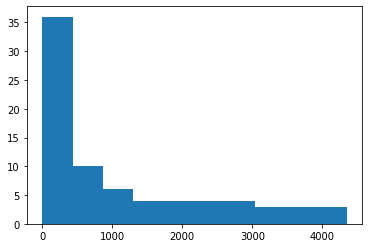

In [99]:
plt.hist(new_data['India']['Deaths'])

(array([ 6.,  5.,  4.,  4.,  3.,  6.,  5., 12., 12., 20.]),
 array([0.        , 0.36378898, 0.72757796, 1.09136694, 1.45515593,
        1.81894491, 2.18273389, 2.54652287, 2.91031185, 3.27410083,
        3.63788982]),
 <a list of 10 Patch objects>)

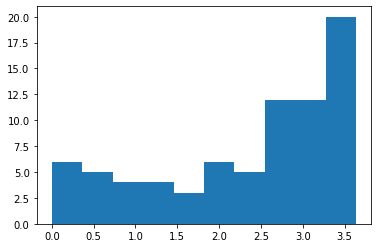

In [100]:
plt.hist(np.log10(new_data['India']['Deaths']))

(array([ 6.,  4.,  4.,  7.,  3.,  5.,  9., 11., 12., 16.]),
 array([1.79239169, 2.13099064, 2.46958959, 2.80818854, 3.14678749,
        3.48538644, 3.82398538, 4.16258433, 4.50118328, 4.83978223,
        5.17838118]),
 <a list of 10 Patch objects>)

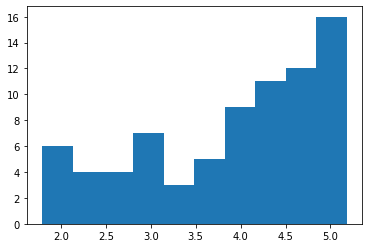

In [101]:
plt.hist(np.log10(new_data['India']['Confirmed']))

(array([ 4.,  9.,  4.,  7.,  5.,  5.,  7., 10., 11., 15.]),
 array([0.60205999, 1.02265955, 1.44325911, 1.86385867, 2.28445823,
        2.7050578 , 3.12565736, 3.54625692, 3.96685648, 4.38745604,
        4.8080556 ]),
 <a list of 10 Patch objects>)

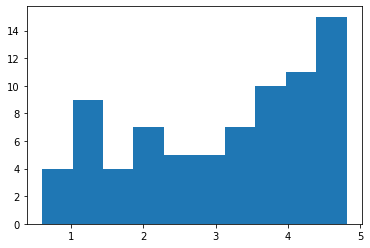

In [102]:
plt.hist(np.log10(new_data['India']['Recovered']))

Apparently they are correlated now. The state of the art research shows the virus has a incubation period of 14 days and manifestation preriod of 7 around days

In [103]:
from sklearn import model_selection

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [105]:
from sklearn.metrics import r2_score,mean_squared_error

In [112]:
y=clean['Deaths']

In [113]:
x=clean[['Confirmed','Recovered']]

In [114]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25)
model_linear_regression=Pipeline([('Scalar',StandardScaler()),('Linear_Regression',LinearRegression())])
model_linear_regression.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('Scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Linear_Regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [117]:
r2_score(model_linear_regression.predict(X_test),y_test)

0.9946399568168642

In [120]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [121]:
joblib.dump(model_linear_regression,'Covid_India.pkl')

['Covid_India.pkl']

Similarly one can do the same for any country. Behind closed border the virus evolves differently so a model for one may not be working for other. Also for future predictions one should always incorporate new data into the model.